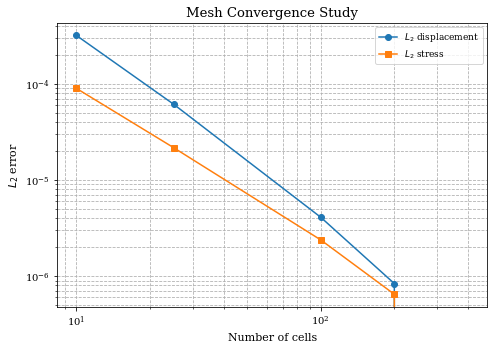

Observed order of convergence:
  Displacement : p ≈ 1.97
  Stress       : p ≈ 1.63


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --------------------------------------------------
# Mesh definitions
# --------------------------------------------------
meshes = np.array([10, 25, 100, 200, 400])
ref_mesh = 400

disp_files = {
    10:  "postProcessing/displacement/pointVSuNx10.csv",
    25:  "postProcessing/displacement/pointVSuNx25.csv",
    50:  "postProcessing/displacement/pointVSuNx50.csv",
    100: "postProcessing/displacement/pointVSuNx100.csv",
    200: "postProcessing/displacement/pointVSuNx200.csv",
    400: "postProcessing/displacement/pointVSuNx400.csv"
}

stress_files = {
    10:  "postProcessing/stress/data_Pxx_10.xy",
    25:  "postProcessing/stress/data_Pxx_25.xy",
    50:  "postProcessing/stress/data_Pxx_50.xy",
    100: "postProcessing/stress/data_Pxx_100.xy",
    200: "postProcessing/stress/data_Pxx_200.xy",
    400: "postProcessing/stress/data_Pxx_400.xy"
}

# --------------------------------------------------
# L2 norm definition
# --------------------------------------------------
def L2_norm(err):
    return np.sqrt(np.mean(err**2))

# --------------------------------------------------
# Load reference solutions
# --------------------------------------------------
# Displacement reference
disp_ref_df = pd.read_csv(disp_files[ref_mesh])
x_disp_ref  = disp_ref_df["Points:0"].values
u_ref       = disp_ref_df["uN:0"].values

# Stress reference
x_stress_ref, stress_ref = np.loadtxt(stress_files[ref_mesh], unpack=True)

# --------------------------------------------------
# Compute errors
# --------------------------------------------------
L2_disp   = []
L2_stress = []

for m in meshes:
    # --- Displacement ---
    disp_df = pd.read_csv(disp_files[m])
    u = disp_df["uN:0"].values

    err_u = u - u_ref
    L2_disp.append(L2_norm(err_u))

    # --- Stress ---
    x_s, stress = np.loadtxt(stress_files[m], unpack=True)

    err_s = stress - stress_ref
    L2_stress.append(L2_norm(err_s))

L2_disp   = np.array(L2_disp)
L2_stress = np.array(L2_stress)

# --------------------------------------------------
# Plot convergence
# --------------------------------------------------
plt.figure(figsize=(7,5))
plt.loglog(meshes, L2_disp,   'o-', label=r'$L_2$ displacement')
plt.loglog(meshes, L2_stress, 's-', label=r'$L_2$ stress')
plt.xlabel('Number of cells')
plt.ylabel(r'$L_2$ error')
plt.grid(True, which="both", ls="--")
plt.legend()
plt.title('Mesh Convergence Study')
plt.tight_layout()
plt.show()

# --------------------------------------------------
# Order of convergence (exclude reference mesh)
# --------------------------------------------------
p_disp   = np.polyfit(np.log(meshes[:-1]), np.log(L2_disp[:-1]), 1)
p_stress = np.polyfit(np.log(meshes[:-1]), np.log(L2_stress[:-1]), 1)

print("Observed order of convergence:")
print(f"  Displacement : p ≈ {-p_disp[0]:.2f}")
print(f"  Stress       : p ≈ {-p_stress[0]:.2f}")


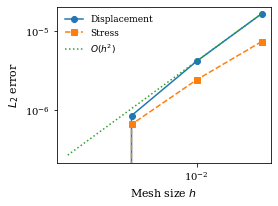

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator

# mesh size
h = 1.0 / meshes.astype(float)

# 2nd-order reference line (anchored at first point)
p = 2
C = L2_disp[0] / h[0]**p
ref = C * h**p

# plot
plt.figure(figsize=(4, 3))

plt.loglog(h, L2_disp, 'o-', label='Displacement')
plt.loglog(h, L2_stress, 's--', label='Stress')
plt.loglog(h, ref, ':', label=r'$O(h^2)$')

plt.xlabel('Mesh size $h$')
plt.ylabel(r'$L_2$ error')

plt.gca().xaxis.set_major_locator(LogLocator(base=10))
plt.minorticks_off()

plt.legend(frameon=False)
plt.tight_layout()
plt.savefig('mesh_convergence_L2.pdf')


In [19]:
# ---------------------------------------------
# Save L2-norm data to .dat files
# ---------------------------------------------
np.savetxt(
    "L2_displacement.dat",
    np.column_stack((meshes, L2_disp)),
    header="Ncells   L2_error",
    comments=''
)

np.savetxt(
    "L2_stress.dat",
    np.column_stack((meshes, L2_stress)),
    header="Ncells   L2_error",
    comments=''
)
